In [1]:
import numpy as np
import pandas as pd
import json
import os
import gzip
from math import log
from matplotlib import pyplot as plt
from scipy.stats import spearmanr, pearsonr, gaussian_kde
%matplotlib inline

In [2]:
dfs = pd.read_excel("../data/experimental/gcPBM/GSE97885_Combined_Max_Myc_Mad_Mad_r_log.xlsx")

In [3]:
dfs.head()

,ID_REF,ID,Sequence,Max,Myc,Mad,Mad_r
0,1,Bound_000001_100_100,CCCACCCGCCGCGCCCACGCGTGCCGCGGTCGCTTG,9.2996,8.4709,8.2177,8.3703
1,2,Bound_000002_100_100,CGGACCCTGGCTCTCCACGCGCCTCCGACATGGCGG,8.9664,7.7519,7.8204,7.9017
2,3,Bound_000003_000_100,GAAGAGGACGGCATGCATGCGGACCCCGTCCACCAC,9.3090,8.1631,8.1330,8.2728
3,4,Bound_018746_001_001,TCATTCCCCCTGTCACACGAGGCAGTGGCAAGCCCG,9.1042,8.4487,7.9879,8.0687
4,5,Bound_018781_001_000,GCCGCCCCGGCTGCGCACGCGACGCCCCCTCCAGGC,8.7017,7.3809,7.4961,7.6516


In [4]:
all_seqs = dfs["Sequence"]
all_ids = dfs["ID"]
all_xvals = dfs["Max"]
all_yvals = np.load('preds/max_yvals.npy')

In [5]:
IDdict = {}
IDdict["unbound"] = []
for i, whole_idx in enumerate(all_ids):
    idx = whole_idx[-7:]
    if idx[0] != '0' and idx[0] != '1':
        IDdict["unbound"].append(i)
        continue
    if idx not in IDdict:
        IDdict[idx] = []
    IDdict[idx].append(i)

In [6]:
IDdict.keys()

dict_keys(['unbound', '100_100', '000_100', '001_001', '001_000', '111_000', '000_001', '111_111', '000_010', '011_000', '010_000', '101_000', '011_010', '111_010', '110_000', '101_111', '011_001', '000_110', '101_001', '100_000', '001_010', '110_100', '111_101', '111_110', '000_101', '100_001', '111_001', '101_101', '111_100', '001_101', '011_101', '011_111', '001_011', '101_100', '100_111', '111_011', '110_111', '011_011', '110_110', '100_101', '101_010', '011_100', '000_111', '000_011', '001_111', '001_100', '101_110', '010_010', '001_110', '110_001', '010_011', '010_001', '110_101', '100_110', '110_010', '010_110', '101_011', '010_101', '010_100', '010_111', '011_110', '100_010', '100_011', '110_011'])

0 9555


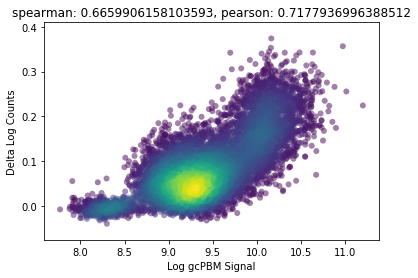

1 10829


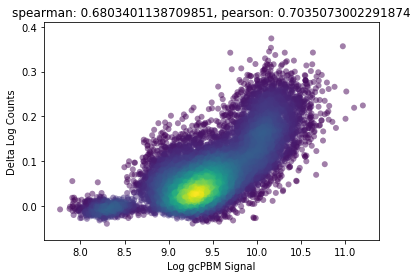

2 13930


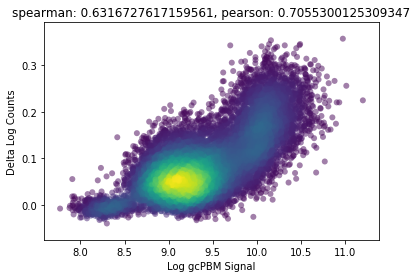

4 6649


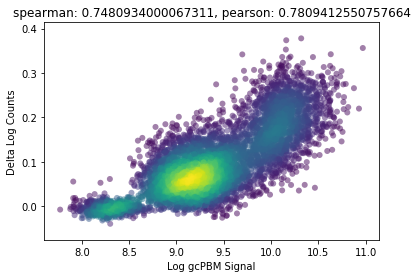

5 4445


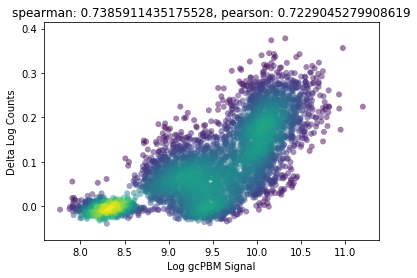

6 8680


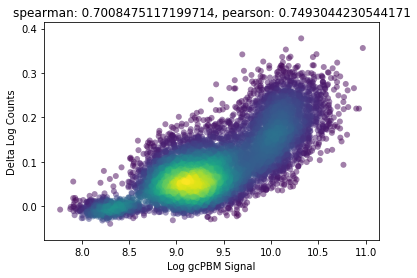

In [7]:
hypotheses = [0,1,2,4,5,6]
for h in hypotheses:
    xvals = []
    yvals = []
    for subpop in IDdict:
        if subpop[h] != '1': continue
        for i in IDdict[subpop]:
            xvals.append(all_xvals[i])
            yvals.append(all_yvals[i])
    for i in IDdict["unbound"]:
        xvals.append(all_xvals[i])
        yvals.append(all_yvals[i])
    print(h, len(xvals))
    xy = np.vstack([xvals,yvals])
    z = gaussian_kde(xy)(xy)
    smallFont = {'size' : 10}
    plt.rc('font', **smallFont)
    fig, ax = plt.subplots()
    ax.scatter(xvals, yvals, c=z, edgecolor='', alpha=0.5)
    plt.xlabel("Log gcPBM Signal")
    plt.ylabel("Delta Log Counts")
    plt.title("spearman: "+ \
              str(spearmanr(xvals, yvals)[0]) + ", pearson: "+ str(pearsonr(xvals, yvals)[0]))
    plt.show()

100_000 1382


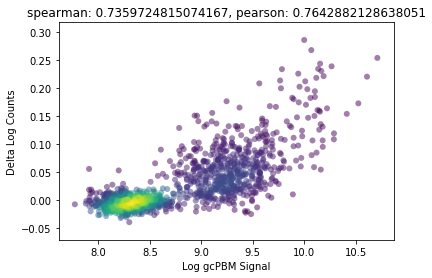

010_000 3258


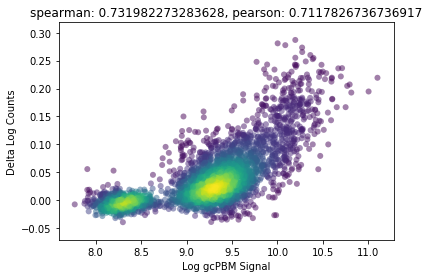

001_000 4382


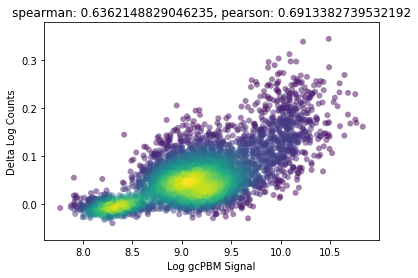

000_100 1511


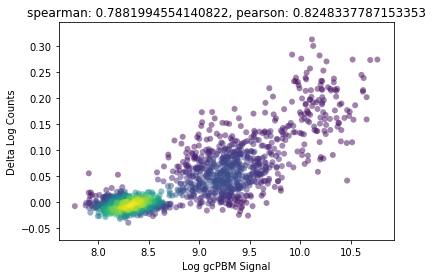

000_010 1738


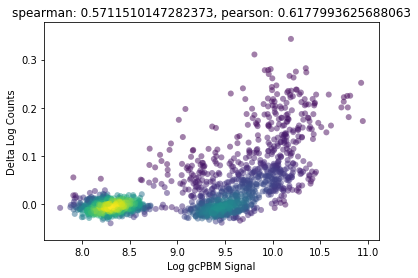

000_001 2014


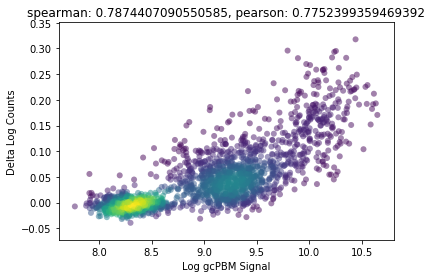

In [8]:
hypotheses = ['100_000',
              '010_000',
              '001_000',
              '000_100',
              '000_010',
              '000_001']
for h in hypotheses:
    xvals = []
    yvals = []
    for subpop in IDdict:
        if subpop != h: continue
        for i in IDdict[subpop]:
            xvals.append(all_xvals[i])
            yvals.append(all_yvals[i])
    for i in IDdict["unbound"]:
        xvals.append(all_xvals[i])
        yvals.append(all_yvals[i])
    print(h, len(xvals))
    xy = np.vstack([xvals,yvals])
    z = gaussian_kde(xy)(xy)
    smallFont = {'size' : 10}
    plt.rc('font', **smallFont)
    fig, ax = plt.subplots()
    ax.scatter(xvals, yvals, c=z, edgecolor='', alpha=0.5)
    plt.xlabel("Log gcPBM Signal")
    plt.ylabel("Delta Log Counts")
    plt.title("spearman: "+ \
              str(spearmanr(xvals, yvals)[0]) + ", pearson: "+ str(pearsonr(xvals, yvals)[0]))
    plt.show()

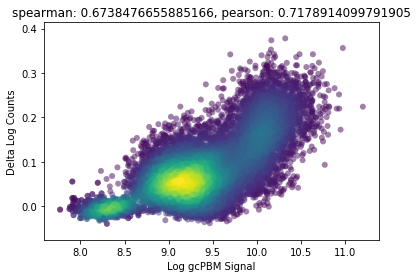

In [9]:
xvals = []
yvals = []
for subpop in IDdict:
    if subpop[4:]=='000': continue
    for i in IDdict[subpop]:
        xvals.append(all_xvals[i])
        yvals.append(all_yvals[i])
for i in IDdict["unbound"]:
    xvals.append(all_xvals[i])
    yvals.append(all_yvals[i])
xy = np.vstack([xvals,yvals])
z = gaussian_kde(xy)(xy)
smallFont = {'size' : 10}
plt.rc('font', **smallFont)
fig, ax = plt.subplots()
ax.scatter(xvals, yvals, c=z, edgecolor='', alpha=0.5)
plt.xlabel("Log gcPBM Signal")
plt.ylabel("Delta Log Counts")
plt.title("spearman: "+ \
          str(spearmanr(xvals, yvals)[0]) + ", pearson: "+ str(pearsonr(xvals, yvals)[0]))
plt.show()

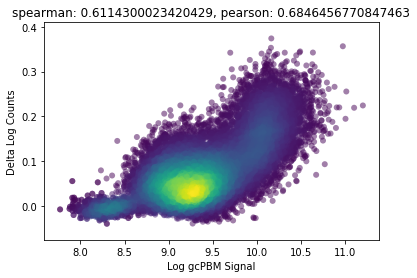

In [10]:
xvals = []
yvals = []
for subpop in IDdict:
    if subpop[:3]=='000': continue
    for i in IDdict[subpop]:
        xvals.append(all_xvals[i])
        yvals.append(all_yvals[i])
for i in IDdict["unbound"]:
    xvals.append(all_xvals[i])
    yvals.append(all_yvals[i])
xy = np.vstack([xvals,yvals])
z = gaussian_kde(xy)(xy)
smallFont = {'size' : 10}
plt.rc('font', **smallFont)
fig, ax = plt.subplots()
ax.scatter(xvals, yvals, c=z, edgecolor='', alpha=0.5)
plt.xlabel("Log gcPBM Signal")
plt.ylabel("Delta Log Counts")
plt.title("spearman: "+ \
          str(spearmanr(xvals, yvals)[0]) + ", pearson: "+ str(pearsonr(xvals, yvals)[0]))
plt.show()

In [11]:
fastapath = "../data/genome/hg19/male.hg19.fa"
GenomeDict={}
sequence=''
inputdatafile = open(fastapath)
for line in inputdatafile:
    if line[0]=='>':
        if sequence != '':
            GenomeDict[chrm] = ''.join(sequence)
        chrm = line.strip().split('>')[1]
        sequence=[]
        Keep=False
        continue
    else:
        sequence.append(line.strip())
GenomeDict[chrm] = ''.join(sequence)

In [14]:
seq_len = 1000
seq_peaks = []
with gzip.open("../data/paralogous/K562_max/idr.optimal_peak.narrowPeak.gz", 'rt') as inp:
    for line in inp:
        chrm = line.strip().split('\t')[0]
        pStart = int(line.strip().split('\t')[1])
        summit = pStart + int(line.strip().split('\t')[-1])
        start = int(summit - (seq_len/2))
        end = int(summit + (seq_len/2))
        seq_peaks.append(GenomeDict[chrm][start:end].upper())

In [15]:
hypotheses = ['100_000',
              '010_000',
              '001_000',
              '000_100',
              '000_010',
              '000_001']
for h in hypotheses:
    count = 0
    for i in IDdict[h]:
        for peak in seq_peaks:
            if all_seqs[i] in peak:
                count += 1
                continue
    print(h, count)

100_000 175
010_000 465
001_000 1487
000_100 424
000_010 372
000_001 696


In [18]:
counts = [175, 465, 1487, 424, 372, 696]
for c, h in zip(counts, hypotheses):
    print(c/len(IDdict[h])*100)

28.000000000000004
18.592562974810075
41.02068965517242
56.233421750663126
37.920489296636084
55.36992840095465
